In [43]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import time
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import RobustScaler #doesn't effect from outlier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier

import warnings
warnings.filterwarnings("ignore")

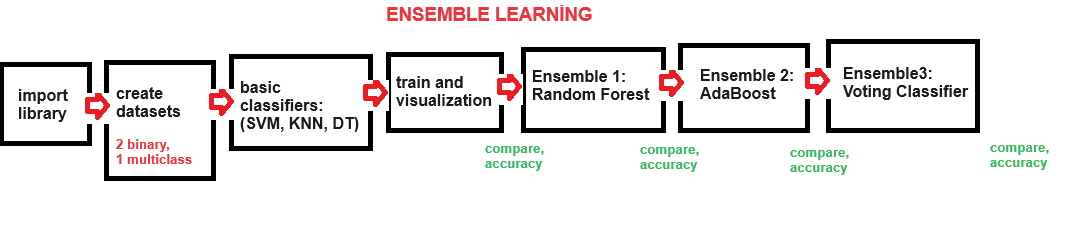

#### Create Datasets

In [44]:
n_samples = 2000 # artarsa(10000) dataset2 %85
n_features = 10   # n_features=85 olursa dataset2 %90
n_classes = 2
random_state = 42
noise_class = 0.2
X, y = make_classification(n_samples = n_samples,
                   n_features = n_features,
                   n_classes = n_classes,
                   n_repeated = 0,
                   n_redundant = 0,
                   n_informative = n_features - 1,
                   random_state = random_state,
                   n_clusters_per_class = 1,
                   flip_y = noise_class)

<Axes: xlabel='0', ylabel='1'>

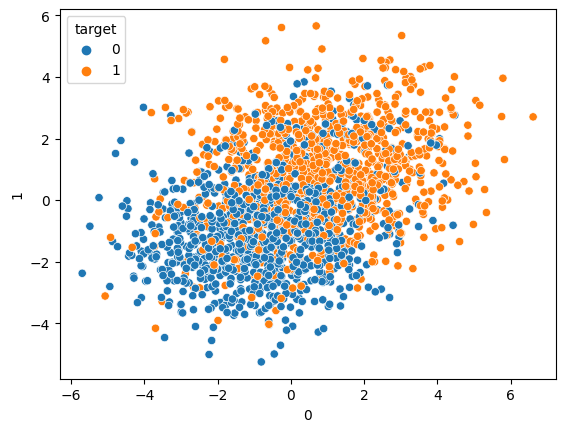

In [45]:
data = pd.DataFrame(X)
data["target"] = y
plt.figure()
sns.scatterplot(x=data.iloc[:,0], y = data.iloc[:, 1], hue="target",data=data)

In [46]:
data_classification = (X,y)

In [47]:
noise_moon = 0.3  #noise azalınca veriler sıralanır
#noise_class = 0.2
moon = make_moons(n_samples = n_samples,noise = noise_moon, random_state = random_state)

In [48]:
#data = pd.DataFrame(moon[0]) #moon[0] = X
#data["target"] = moon[1] #moon[1] = y
#plt.figure()
#sns.scatterplot(x=data.iloc[:,0], y = data.iloc[:, 1], hue="target",data=data)

In [49]:
noise_circle = 0.3,  #noise azalınca veriler sıralanır
noise_class = 0.3
circle = make_circles(n_samples = n_samples, factor = 0.1, noise = noise_circle, random_state = random_state)

In [50]:
#data = pd.DataFrame(circle[0]) #moon[0] = X
#data["target"] = circle[1] #moon[1] = y
#plt.figure()
#sns.scatterplot(x=data.iloc[:,0], y = data.iloc[:, 1], hue="target",data=data)

In [51]:
datasets = [moon, circle] #2 boyutlu binary classification datasets

#### SVM, KNN, DT, RF, ADA, VC

In [52]:
svc = SVC()
knn = KNeighborsClassifier(n_neighbors = 15)
dt = DecisionTreeClassifier(random_state = random_state)

n_estimators = 10
rf = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state, max_depth = 2 )
ada = AdaBoostClassifier(base_estimator = dt, n_estimators=n_estimators, random_state=random_state)
v1 = VotingClassifier(estimators = [("svc",svc),("knn",knn),("dt",dt),("rf",rf),("ada",ada)])

names = ["SVC", "KNN", "Decision Tree", "Random Forest", "Ada Boost", "V1"]
classifiers = [svc, knn, dt, rf, ada, v1]

Dataset # 0
SVC: test set score: 0.91375 
SVC: train set score: 0.915 

KNN: test set score: 0.90375 
KNN: train set score: 0.9291666666666667 

Decision Tree: test set score: 0.855 
Decision Tree: train set score: 1.0 

Random Forest: test set score: 0.8875 
Random Forest: train set score: 0.895 

Ada Boost: test set score: 0.8575 
Ada Boost: train set score: 1.0 

V1: test set score: 0.90375 
V1: train set score: 0.9483333333333334 

-------------------------------------
Dataset # 1
SVC: test set score: 0.89 
SVC: train set score: 0.9116666666666666 

KNN: test set score: 0.88375 
KNN: train set score: 0.9058333333333334 

Decision Tree: test set score: 0.85125 
Decision Tree: train set score: 1.0 

Random Forest: test set score: 0.87875 
Random Forest: train set score: 0.91 

Ada Boost: test set score: 0.84625 
Ada Boost: train set score: 1.0 

V1: test set score: 0.8825 
V1: train set score: 0.9333333333333333 

-------------------------------------


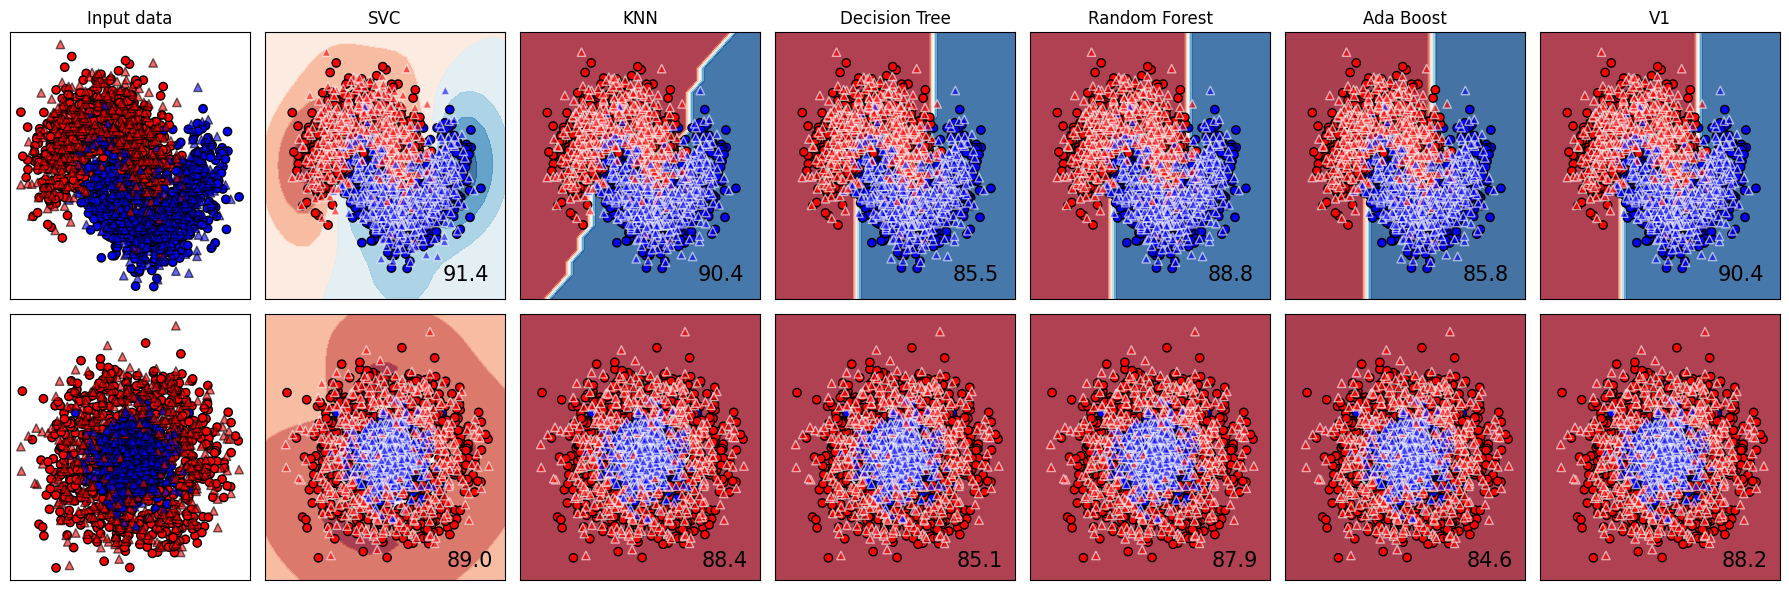

In [53]:
h=0.2
i=1
figure = plt.figure(figsize=(18, 6))
for ds_cnt, ds in enumerate(datasets): #ds_cnt index döndürür.
    # preprocess dataset, split into training and test part
    X, y = ds
    X = RobustScaler().fit_transform(X) #scale againist outliers. mean=0, std=1
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=random_state)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) +1, i) #subplot(row,columns)
    
    if ds_cnt == 0:
        ax.set_title("Input data")
    
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,edgecolors='k')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,marker = '^', edgecolors='k')
    
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    print("Dataset # {}".format(ds_cnt))
    
    for name, clf in zip(names, classifiers):
        
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        
        clf.fit(X_train, y_train)
        
        score = clf.score(X_test, y_test)
        
        print("{}: test set score: {} ".format(name, score))
        
        score_train = clf.score(X_train, y_train)  
        
        print("{}: train set score: {} ".format(name, score_train))
        print()
        
        
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,marker = '^',
                   edgecolors='white', alpha=0.6)

        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        score = score*100
        ax.text(xx.max() - .3, yy.min() + .3, ('%.1f' % score),
                size=15, horizontalalignment='right')
        i += 1
    print("-------------------------------------")

plt.tight_layout()
plt.show()

In [54]:
# arka plan (mesh grid), öndeki büyükler train, etrafı beyaz olan test sonuçları

In [55]:
def make_classify(dc, clf, name):
    x, y = dc
    x = RobustScaler().fit_transform(x)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.4, random_state=random_state)
    
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print("{}: test set score: {} ".format(name, score))
        score_train = clf.score(X_train, y_train)  
        print("{}: train set score: {} ".format(name, score_train))
        print()

print("Dataset # 2")   
make_classify(data_classification, classifiers,names) 

Dataset # 2
SVC: test set score: 0.89125 
SVC: train set score: 0.8891666666666667 

KNN: test set score: 0.885 
KNN: train set score: 0.8841666666666667 

Decision Tree: test set score: 0.775 
Decision Tree: train set score: 1.0 

Random Forest: test set score: 0.83375 
Random Forest: train set score: 0.8466666666666667 

Ada Boost: test set score: 0.77375 
Ada Boost: train set score: 1.0 

V1: test set score: 0.87625 
V1: train set score: 0.9033333333333333 



In [56]:
# SVM için dimension(n_features) arttıkça avantajlı olur, binary classfication
# KNN multiclass, is effected by outliers.
# DT, overfitting problem, for fixing it > regularization and random forest

### RANDOM FOREST
* Random Forest consists of Decision Trees
* Bootstrapped : Training data is spreaded randomly and it create subsets.
* Then they are classified by Decision Trees
* Aggregate : The results of test set which is classified by Decision Trees
* Bagging

#### Adaptive Boosting
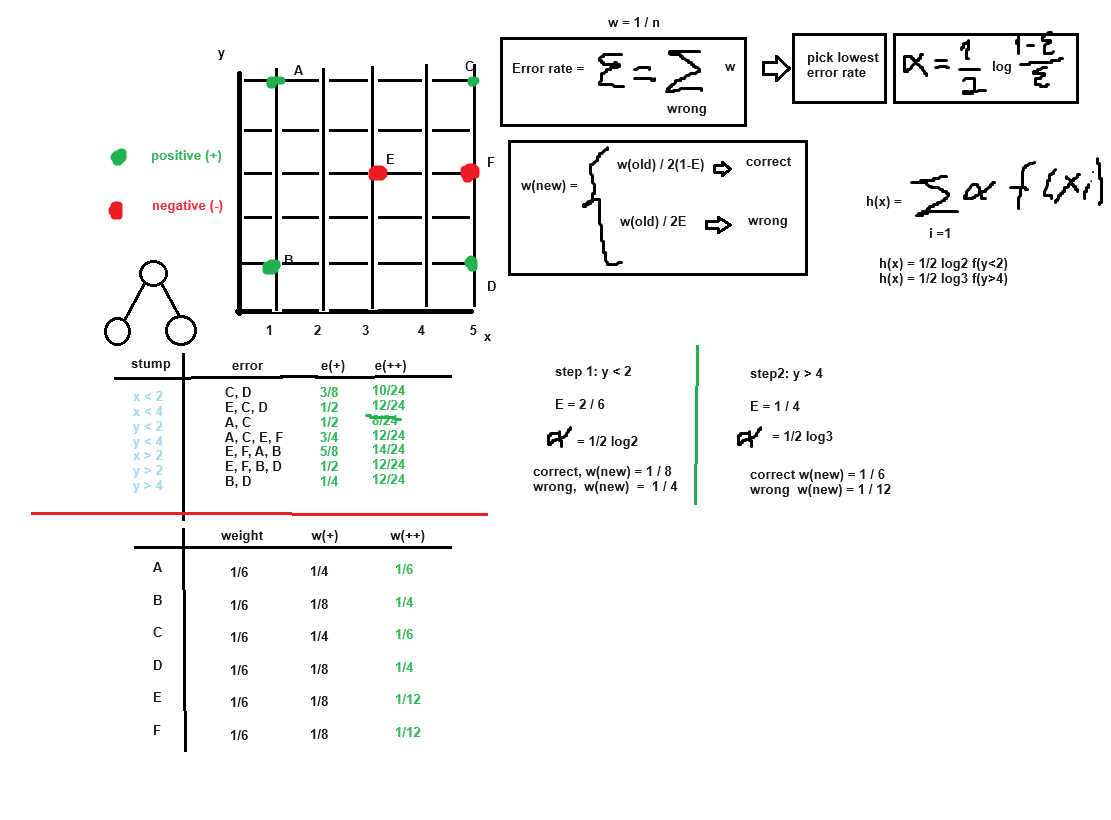

#### Voting Classifier
* Hard voting = The most output of classifiers 1 or 0
* Soft voting = It uses probability output